In [1]:
using Pkg
Pkg.activate(dirname(dirname(pwd())))   # activate MyPackage
# Pkg.instantiate()
using Revise
using CairoMakie, LMC, JLD2

  Activating project at `~/Documents/Work/PostdocDonosti/Packages/LMC`


Loaded plotting extension


In [6]:
pdPID = 3233472#3232955#3225092#3225399
drudePID = 3228119

3228119

In [7]:
pdpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPID)_merged_data.jld"
pdpresetpath = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(pdPID)_merged_presets.jld"
pathdrude = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(drudePID)_merged_data.jld"
presetsdrude = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/$(drudePID)_merged_presets.jld"

"/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/ClusterDATA/LMC/3228119_merged_presets.jld"

In [23]:
function plot_phasediagrams(pdpath, pdpresetpath)
    ppd = load(pdpresetpath)
    pddata = load(pdpath)
    vals, vals2 = ppd["presets"]
    _, pdpresets = vals
    _, first_value = first(pddata["merged"])
    keylist = keys(first_value)
    Ezs = []
    nss = []
    for (path, d) in pddata["merged"]
        Ez = d["Ezs"][1]
        ns = d["nss"][1]
        push!(Ezs, Ez)
        push!(nss, ns)
    end
    sorted_inds = sortperm(Ezs)
    νlist = first_value["nu_list"]
    plot_characters(pdpresets.N, pdpresets.U, pdpresets.J, Ezs[sorted_inds], νlist, nss[sorted_inds])
end


plot_cluster_bandsanddos (generic function with 2 methods)

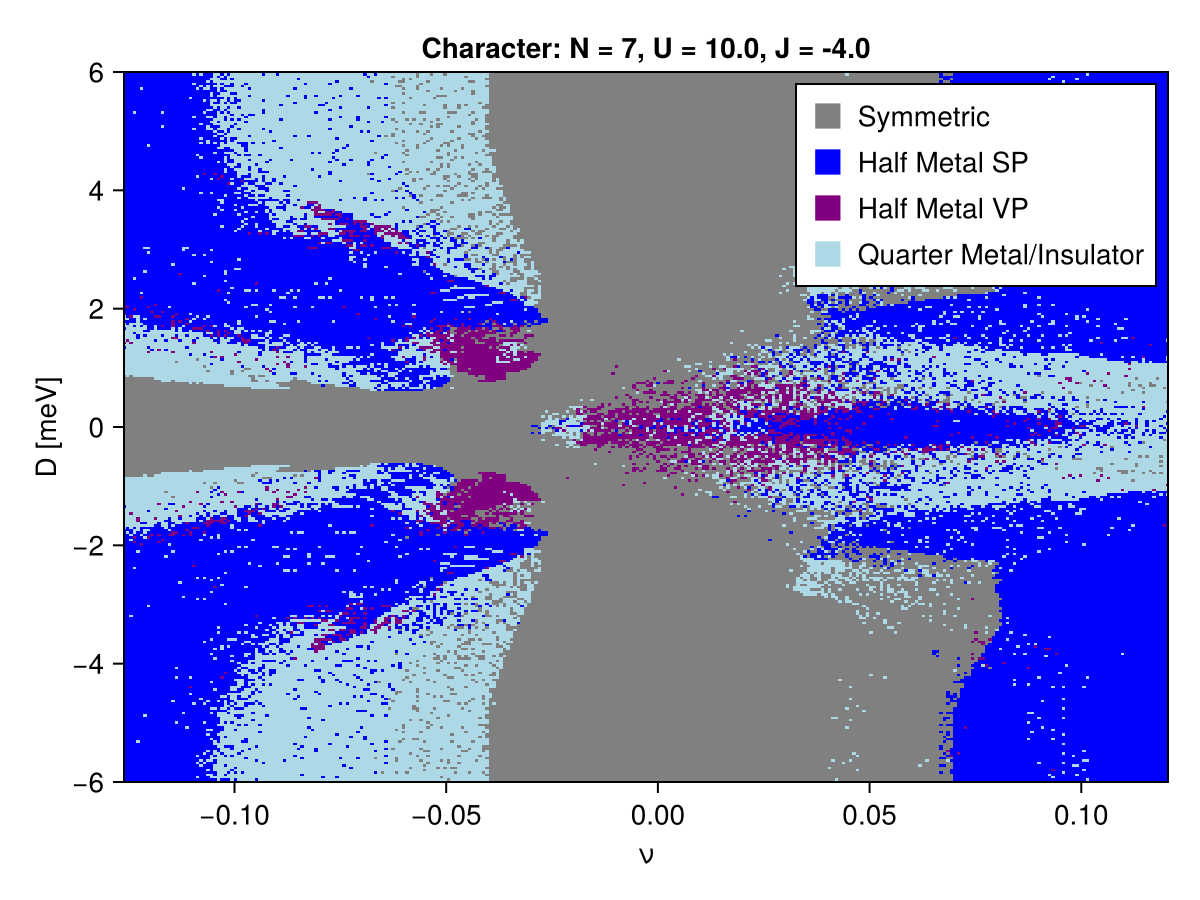

In [16]:

plot_phasediagrams(pdpath, pdpresetpath)

In [26]:


function plot_cluster_bandsanddos(pdpath, pdpresetpath, Ezval, νval)
    ppd = load(pdpresetpath)
    pddata = load(pdpath)
    vals, vals2 = ppd["presets"]
    _, pdpresets = vals
    _, first_value = first(pddata["merged"])
    keylist = keys(first_value)
    Ezs = []
    muss = []
    count = 1
    for (path, d) in pddata["merged"]
        Ez = d["Ezs"][1]
        mus = d["mus"][1]
        push!(Ezs, Ez)
        push!(muss, mus)
    end
    
    νlist = first_value["nu_list"]
    idxnu = argmin(abs.(νlist .- νval))

    idxEz = argmin(abs.(Ezs .- Ezval))
    



    spinfull_plotbandsanddos(pdpresets.N, pdpresets.p, νlist[idxnu], muss[idxEz][idxnu], Ezs[idxEz], collect(-10:0.1:10); points = 100, evals = 5e3, η = 0.1)
end

function spinfull_plotbandsanddos(N, p, nαs, μαs, Ez, μlist; points = 100, evals = 100, η = 0.05)

    ps =[Params_rhombohedral(p, μ = μαs[1], ξ = 1, Delta_Ez = Ez, Valley_asym = 0),
    Params_rhombohedral(p, μ = μαs[2], ξ = -1, Delta_Ez = Ez, Valley_asym = 0),
    Params_rhombohedral(p, μ = μαs[3], ξ = 1, Delta_Ez = Ez, Valley_asym = 0),
    Params_rhombohedral(p, μ = μαs[4], ξ = -1, Delta_Ez = Ez, Valley_asym = 0)]

    
    fig = Figure()
    ax = Axis(fig[1, 1]; xlabel = "kx", ylabel = "E [meV]", 
        title = "N = $(N), ν = $(round(sum(nαs),digits = 2)), Ez = $(Ez)")
    # spinfull_plotbands!(ax, N, p, μαs, Ez, points = points)
    
    
    LMC.abcNplotbandsk(ax, N, points, ps[1]; ylims = [-1, 1])#, style = :solid)
    LMC.abcNplotbandsk(ax, N, points, ps[2]; ylims = [-1, 1])#, style = :dash)
    LMC.abcNplotbandsk(ax, N, points, ps[3]; ylims = [-1, 1])#, style = :solid)
    LMC.abcNplotbandsk(ax, N, points, ps[4]; ylims = [-1, 1])#, style = :dash)
    
    ax2 = Axis(fig[1,2], xlabel = "μ [meV]", ylabel = "DOS (a.u.)", title = "ν = $(round(sum(nαs),digits = 2)), Ez = $(Ez)")
    ω, js = spinfull_dos(N, ps, η, evals, μlist)
    plot_dos!(ax2, ω, js)
    fig
end


function spinfull_plotbands(N, p, nαs, μαs, Ez; points = 100)
    fig = Figure()
    ax = Axis(fig[1:2, 0]; xlabel = "kx", ylabel = "E [meV]", title = "N = $(N), ν = $(round(sum(nαs),digits = 2)), Ez = $(Ez)")
    spinfull_plotbands!(ax, N, p, μαs, Ez, points = points)
    return fig
end
"""
Now 1 → K↑, 2 → K'↑, 3 → K↓, 4 → K'↓.
"""
function spinfull_plotbands!(ax, N, p, μαs, Ez; points = 100)
    ps =[Params_rhombohedral(p, μ = μαs[1], ξ = 1, Delta_Ez = Ez, Valley_asym = 0),
        Params_rhombohedral(p, μ = μαs[2], ξ = -1, Delta_Ez = Ez, Valley_asym = 0),
        Params_rhombohedral(p, μ = μαs[3], ξ = 1, Delta_Ez = Ez, Valley_asym = 0),
        Params_rhombohedral(p, μ = μαs[4], ξ = -1, Delta_Ez = Ez, Valley_asym = 0)]

    LMC.abcNplotbandsk(ax, N, points, ps[1]; ylims = [-1, 1])#, style = :solid)
    LMC.abcNplotbandsk(ax, N, points, ps[2]; ylims = [-1, 1])#, style = :dash)
    LMC.abcNplotbandsk(ax, N, points, ps[3]; ylims = [-1, 1])#, style = :solid)
    LMC.abcNplotbandsk(ax, N, points, ps[4]; ylims = [-1, 1])#, style = :dash)
end

# function spinfull_dos(N, p, ns, μαs, Ez; evals = 100, η = 0.05)

#     ps =[Params_rhombohedral(p, μ = μαs[1], ξ = 1, Delta_Ez = Ez, Valley_asym = 0),
#         Params_rhombohedral(p, μ = μαs[2], ξ = -1, Delta_Ez = Ez, Valley_asym = 0),
#         Params_rhombohedral(p, μ = μαs[3], ξ = 1, Delta_Ez = Ez, Valley_asym = 0),
#         Params_rhombohedral(p, μ = μαs[4], ξ = -1, Delta_Ez = Ez, Valley_asym = 0)]

#     ω, js = spinfull_dos(N, ps, η, evals)
#     fig = Figure()
#     ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "DOS (a.u.)", title = "ν = $(round(sum(ns),digits = 2)), Ez = $(Ez)")
#     plot_dos!(ax, ω, js)
#     fig
# end

function spinfull_dos(N, ps, η, evals, μlist)
    nps = [xxx_lmc_presets(N, ps[i]) for i in 1:length(ps)]
    ω, j1 = c_dos(nps[1], μlist, η = η, evals = evals)
    ω, j2 = c_dos(nps[2], μlist, η = η, evals = evals)
    ω, j3 = c_dos(nps[3], μlist, η = η, evals = evals)
    ω, j4 = c_dos(nps[4], μlist, η = η, evals = evals)
    return ω, [j1,j2,j3,j4]
end

function plot_dos!(ax, ω, js)
    colors = [:black, :black, :gray, :gray]
    styles = [:solid, :dash, :solid, :dash]
    labels = ["K↑", "K'↑", "K↓","K'↓"]
    for (i,j) in enumerate(js)
        lines!(ax, ω, j, color = colors[i], linestyle = styles[i], label = labels[i])
    end
    axislegend(ax)
end

plot_dos! (generic function with 1 method)

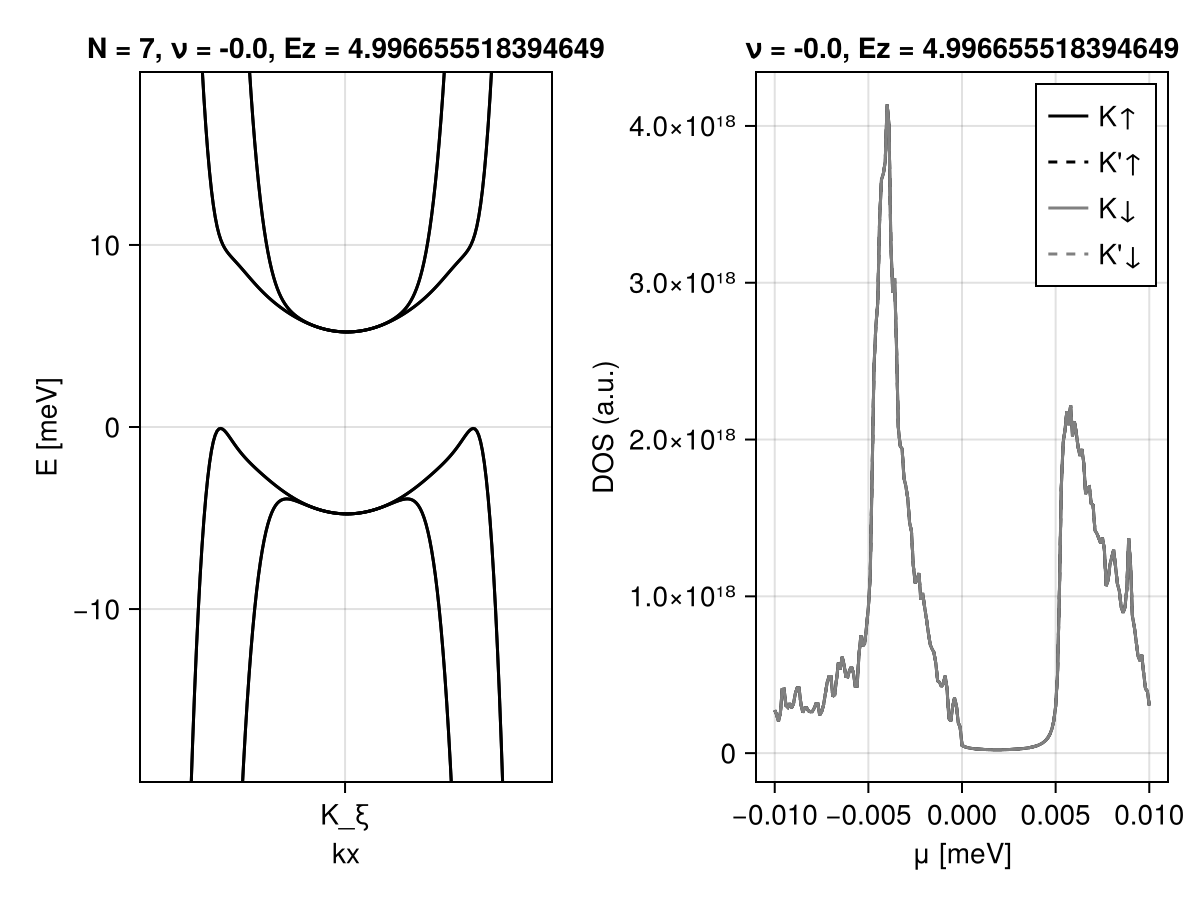

In [30]:
plot_cluster_bandsanddos(pdpath, pdpresetpath, 5, 0.0)

## Observables

In [82]:
pddata = load(pathpd)
_, first_value = first(pddata["merged"])
keylist = keys(first_value)
keylist

KeySet for a Dict{String, Any} with 4 entries. Keys:
  "nu_list"
  "nss"
  "Ezs"
  "mus"

In [88]:
Ezs = []
for (path, d) in pddata["merged"]
    Ez = d["Ezs"][1]
    push!(Ezs, Ez)
end
Ezs

300-element Vector{Any}:
 -2.789297658862876
 -1.3043478260869565
  3.471571906354515
  4.033444816053512
 -2.668896321070234
 -4.555183946488294
 -1.1438127090301002
 -1.2240802675585285
 -4.51505016722408
 -4.996655518394649
  ⋮
  2.0267558528428093
 -3.7525083612040135
  1.5451505016722409
 -3.431438127090301
  2.0668896321070234
  1.9866220735785953
 -5.438127090301004
  2.709030100334448
 -5.59866220735786

In [74]:
vals  = pdrude["presets"]
vals["comp_struct"]
vals["comp_struct"]

Observable_computation
  job_id: Int64 0
  jobs_num: Int64 299
  PID: String "3228119"
  interpPID: String "3224628"
  phasediagPID: String "3225399"
  evals: Int64 100000
  T: Float64 1.0
  tau: Float64 200.0
  which_observable: String "Drude"


In [73]:
_, first_value = first(data["merged"])
keys(first_value)

KeySet for a Dict{String, Any} with 5 entries. Keys:
  "nu_list"
  "obs_list"
  "nss"
  "Ezs"
  "mus"

In [25]:
data = load(paths) # load data
# reveal keys 
_, first_value = first(data["merged"])
keys(first_value)

KeySet for a Dict{String, Any} with 5 entries. Keys:
  "nu_list"
  "obs_list"
  "nss"
  "Ezs"
  "mus"

In [32]:
first_value = first(values(data["merged"]))
first_value["Ezs"]
first_value["mus"]
first_value["nu_list"]

301-element Vector{Float64}:
 -0.12322721692731187
 -0.12240570214779645
 -0.12158418736828104
 -0.12076267258876562
 -0.11994115780925022
 -0.1191196430297348
 -0.11829812825021939
 -0.11747661347070397
 -0.11665509869118856
 -0.11583358391167314
  ⋮
  0.11665509869118873
  0.11747661347070415
  0.11829812825021957
  0.11911964302973496
  0.11994115780925038
  0.1207626725887658
  0.12158418736828122
  0.12240570214779661
  0.12322721692731203

In [24]:
for (path, d) in data["merged"]
    println("From: ", path)

    @show keys(d)

    Ezs = d["Ezs"]


    # do plotting / processing
end

From: /scratch/ferpe/LMC/Data/Drude/3228119/108/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/0/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/86/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/206/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/207/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/221/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/119/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/172/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "mus"]
From: /scratch/ferpe/LMC/Data/Drude/3228119/124/data.jld
keys(d) = ["nu_list", "obs_list", "nss", "Ezs", "m

In [ ]:
for (k,t) in keys(data["merged"])
    println(t)
end